 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns
whale_path = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_path, parse_dates=True, index_col="Date", infer_datetime_format=True)
whale_returns.sort_index(inplace=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5]:
# Reading algorithmic returns
algo_path = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_path, parse_dates=True, index_col="Date", infer_datetime_format=True)
algo_returns.sort_index(inplace=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P TSX 60 Closing Prices
sptsx60_path = Path("Resources/sp_tsx_history.csv")
sptsx60_close = pd.read_csv(sptsx60_path, parse_dates=True, index_col="Date", infer_datetime_format=True)
sptsx60_close.sort_index(inplace=True)
sptsx60_close.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [9]:
# Check Data Types
sptsx60_close.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sptsx60_close['Close'] = sptsx60_close['Close'].replace(r'[$,]','',regex=True).astype('float')
sptsx60_close.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [11]:
# Calculate Daily Returns
sptsx60_returns = sptsx60_close.pct_change()
sptsx60_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [12]:
# Drop nulls
sptsx60_returns.dropna(inplace=True)
sptsx60_returns.isnull().sum()

Close    0
dtype: int64

In [13]:
# Rename `Close` Column to be specific to this portfolio.
sptsx60_returns.columns = ["S&P TSX 60"]
sptsx60_returns.head()

,S&P TSX 60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
all_portfolio_returns = pd.concat([whale_returns, algo_returns, sptsx60_returns], axis='columns', join='inner')
all_portfolio_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns of all Portfolios'}, xlabel='Date'>

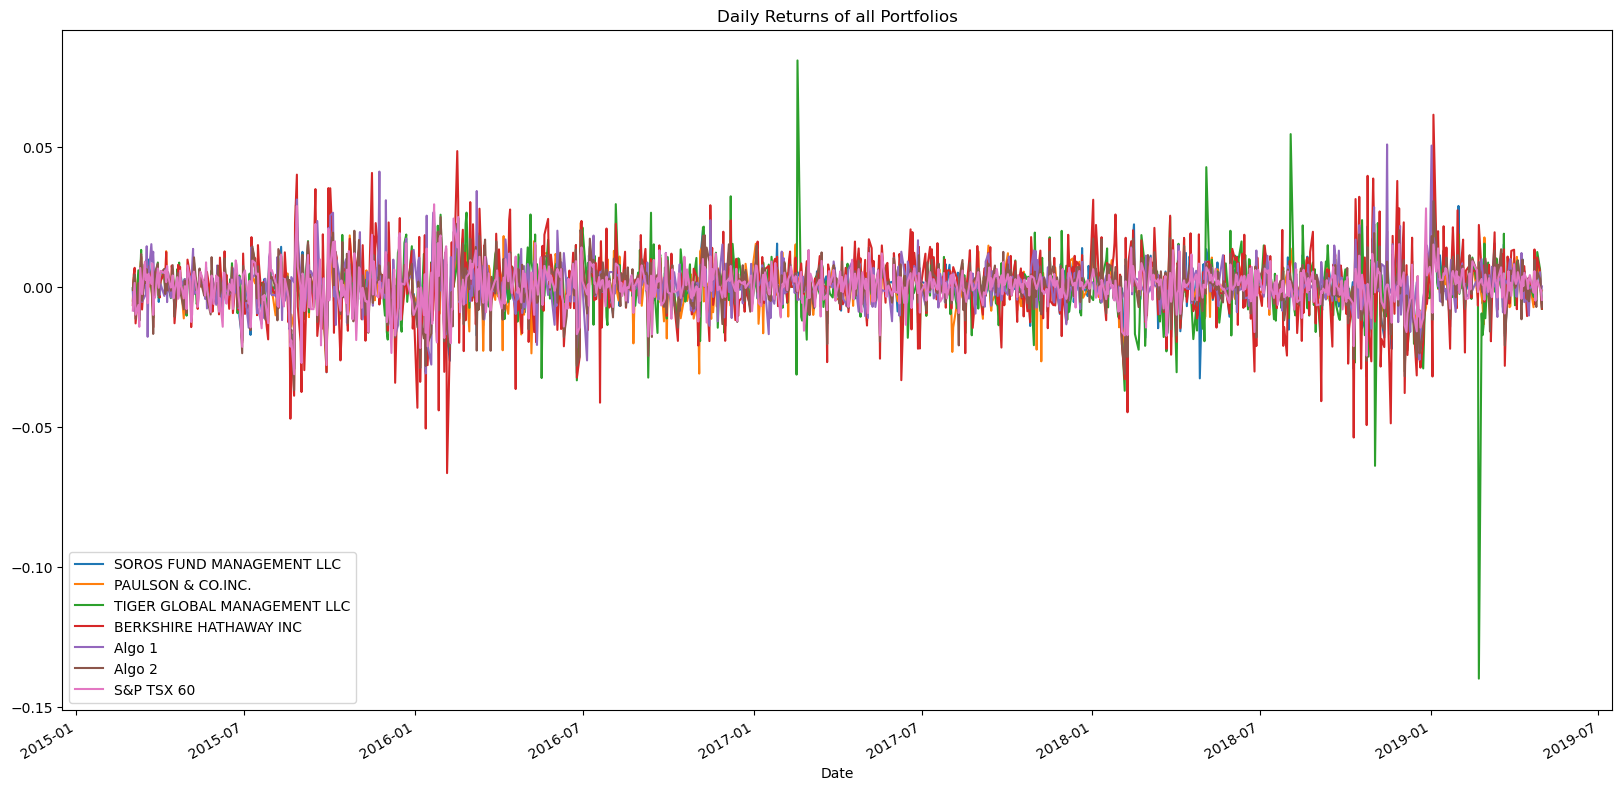

In [15]:
# Plot daily returns of all portfolios
all_portfolio_returns.plot(figsize=(20,10), title="Daily Returns of all Portfolios")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns of all Portfolios'}, xlabel='Date'>

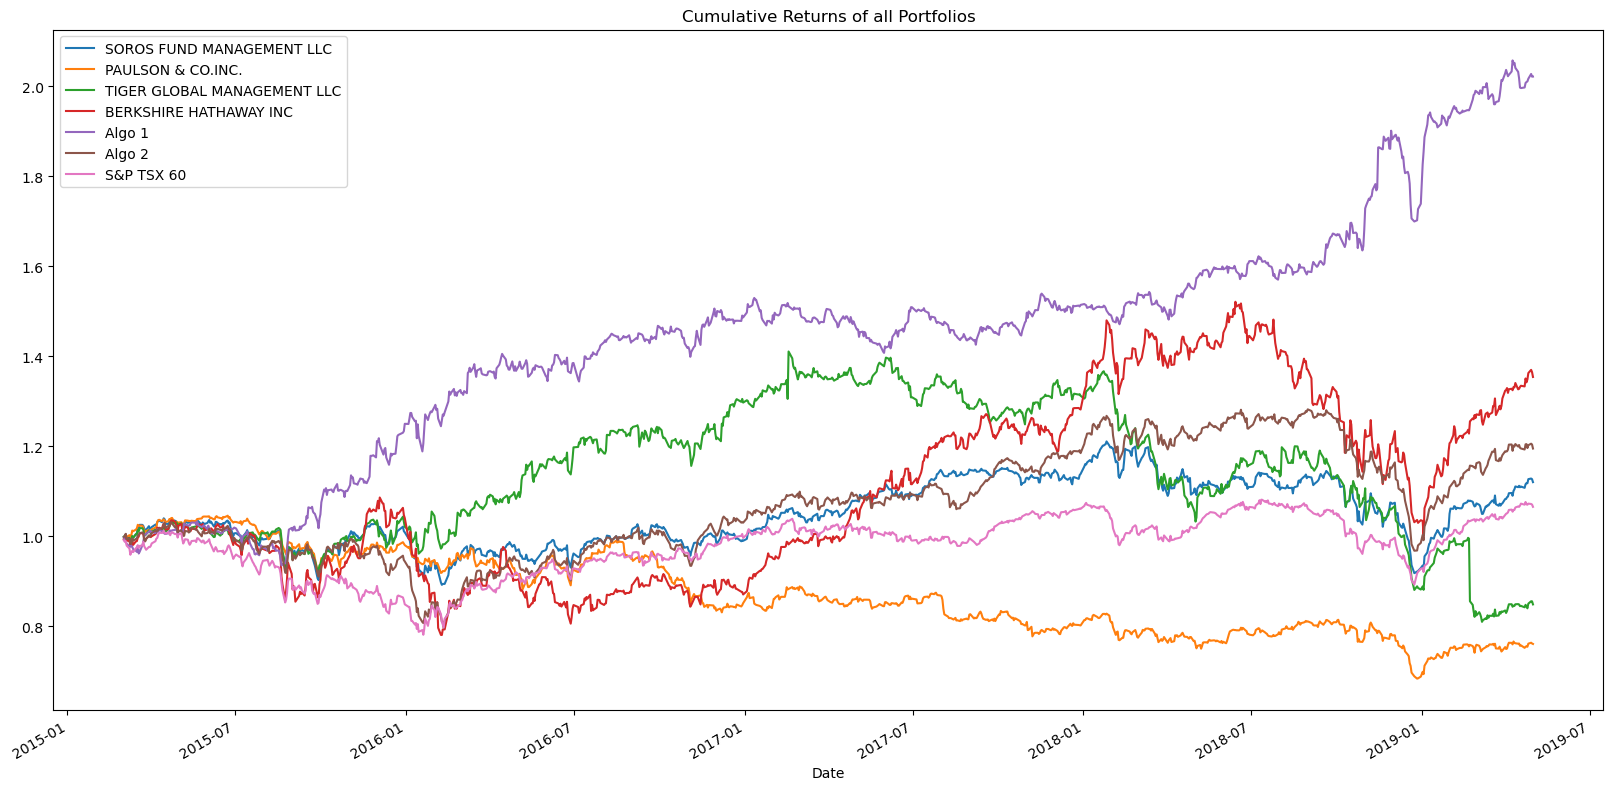

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_portfolio_returns).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10), title= "Cumulative Returns of all Portfolios")

**Based on the above graph, Algo 1, Algo 2, Berkshire Hathaway Inc. and Soros Fund Management LLC outperform S&P TSX 60.** 

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

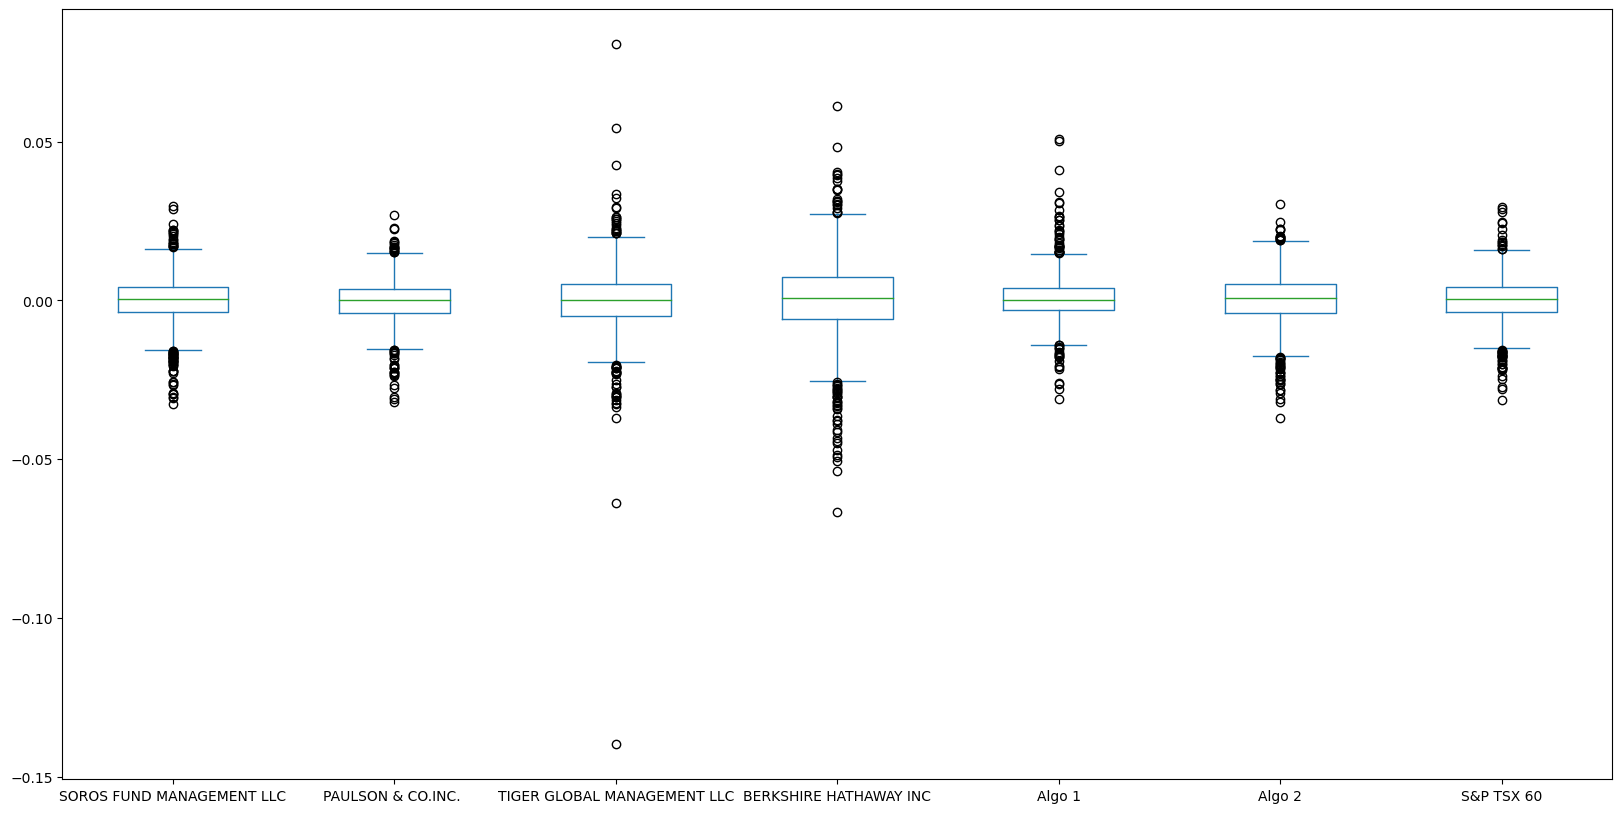

In [17]:
# Box plot to visually show risk
all_portfolio_returns.plot.box(figsize=(20,10))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
all_portfolio_std = all_portfolio_returns.std()
all_portfolio_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX 60                     0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [19]:
# Determine which portfolios are riskier than the S&P TSX 60
riskier_portfolios = all_portfolio_std[all_portfolio_std > all_portfolio_std['S&P TSX 60']]
riskier_portfolios

SOROS FUND MANAGEMENT LLC      0.007828
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
dtype: float64

**Soros Fund Management, Tiger Global Management LLC, Berkshire Hathaway Inc., Algo 1 and Algo 2 are riskier than S&P TSX 60**

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = all_portfolio_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX 60                     0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling 21-Day Standard Deviation of all Portfolios'}, xlabel='Date'>

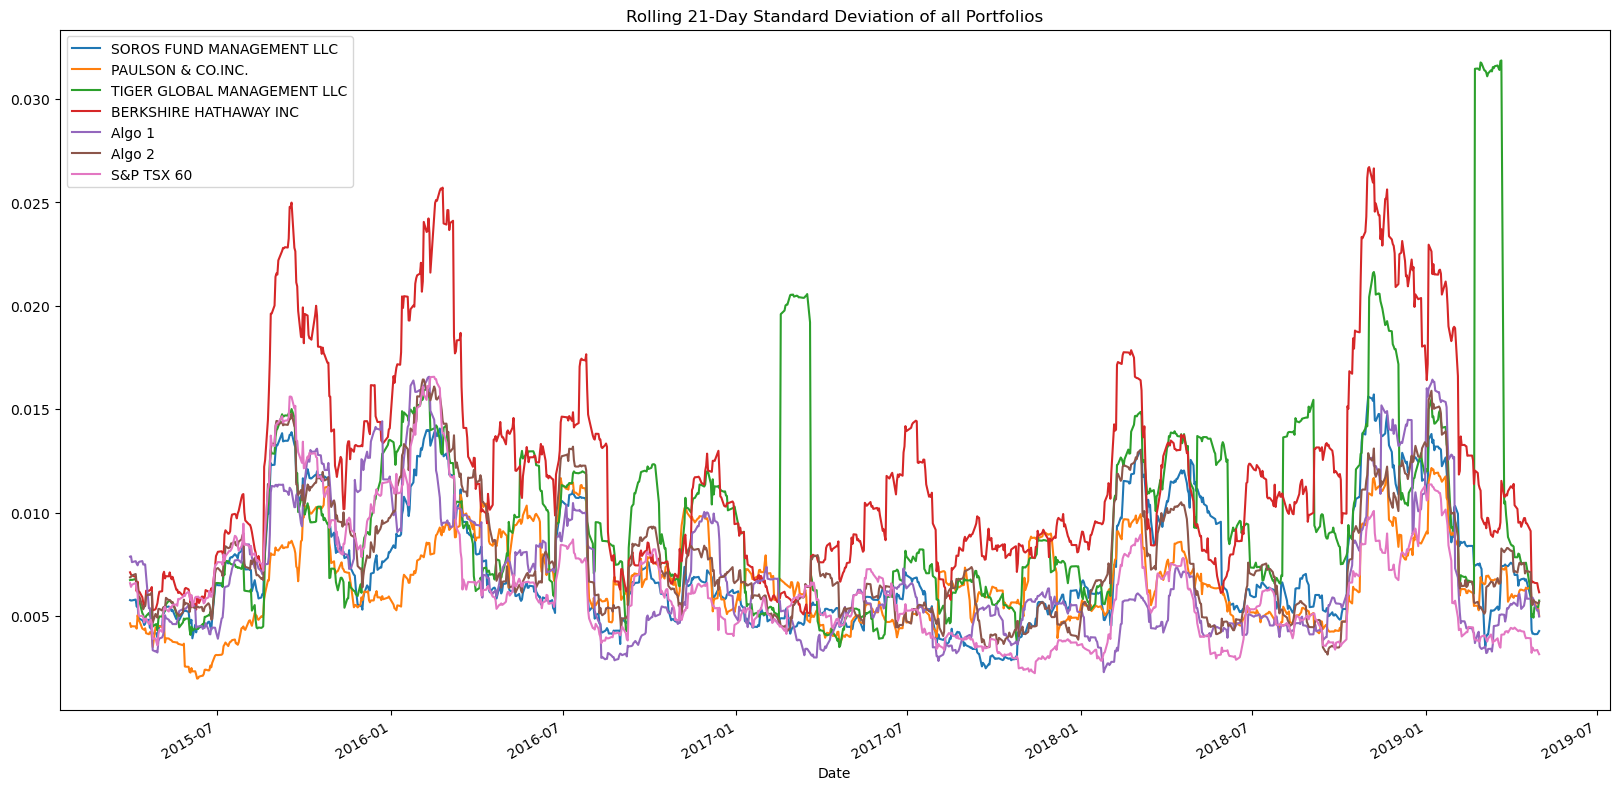

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
all_portfolio_returns.rolling(window=21).std().plot(figsize=[20,10], title="Rolling 21-Day Standard Deviation of all Portfolios")

### Calculate and plot the correlation

In [22]:
# Calculate the correlation
correlation = all_portfolio_returns.corr()

# Display the correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX 60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

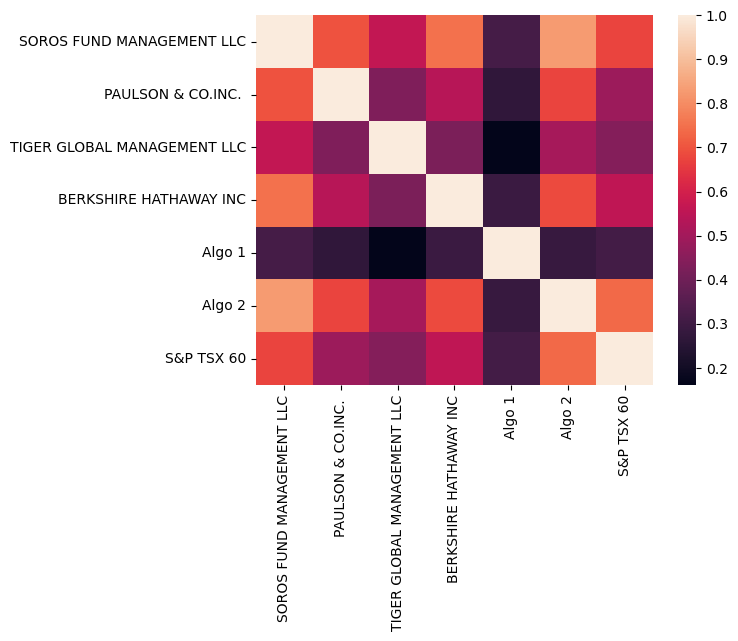

In [23]:
# Plot the correlation matrix
sns.heatmap(correlation)

<AxesSubplot:xlabel='S&P TSX 60', ylabel='Algo 2'>

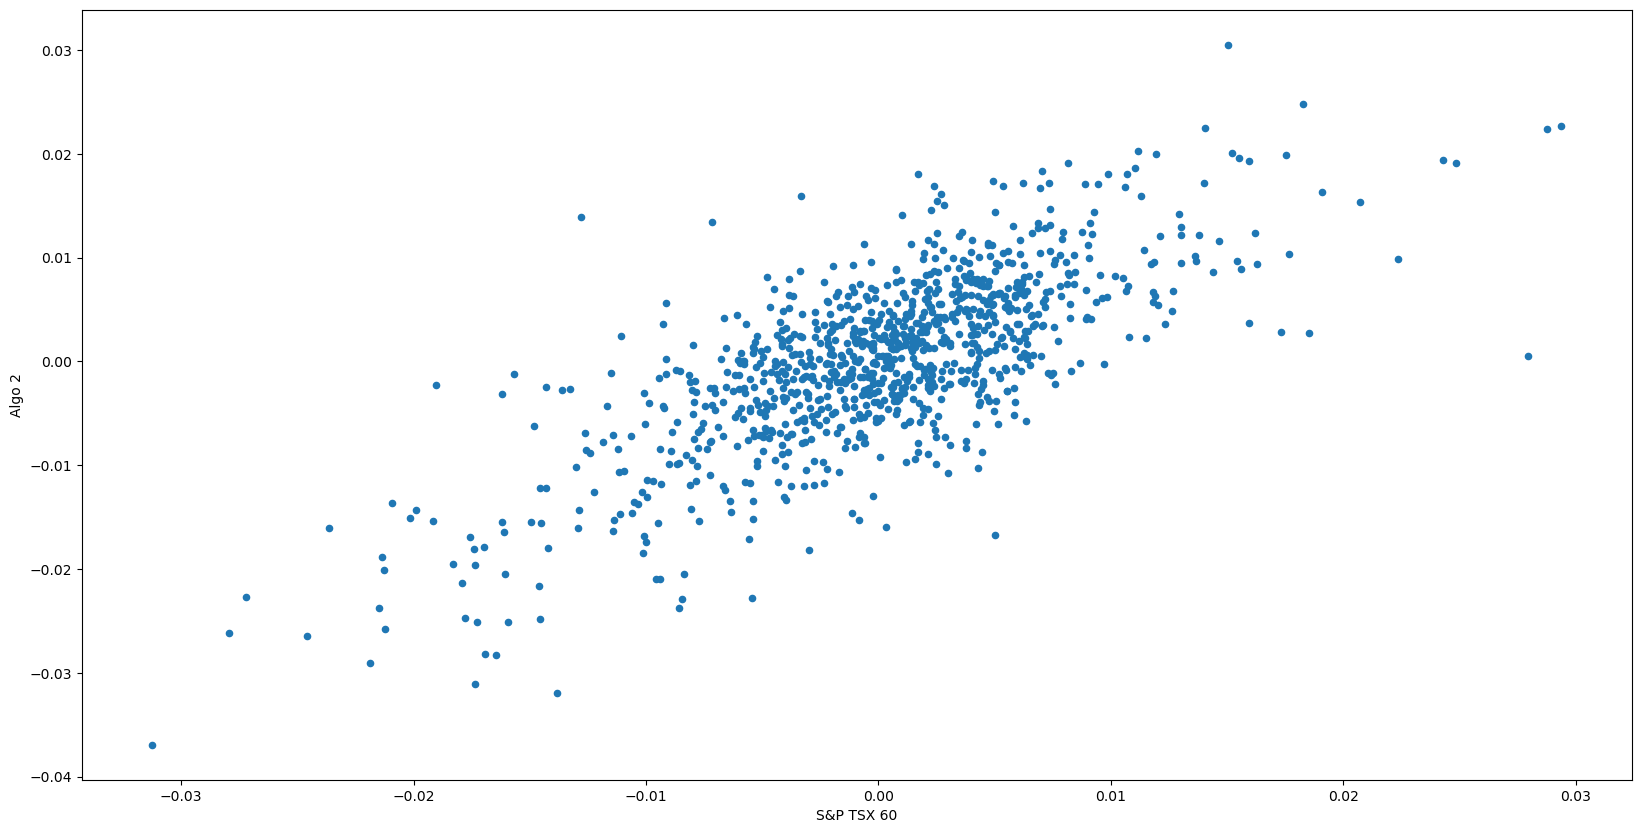

In [24]:
all_portfolio_returns.plot(kind="scatter", y = "Algo 2", x = "S&P TSX 60", figsize = (20,10))

**Algo 2 best mimicks the S&P TSX 60 as they have high correlation**

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Algo 2 Returns vs. S&P TSX 60 Returns'}, xlabel='Date'>

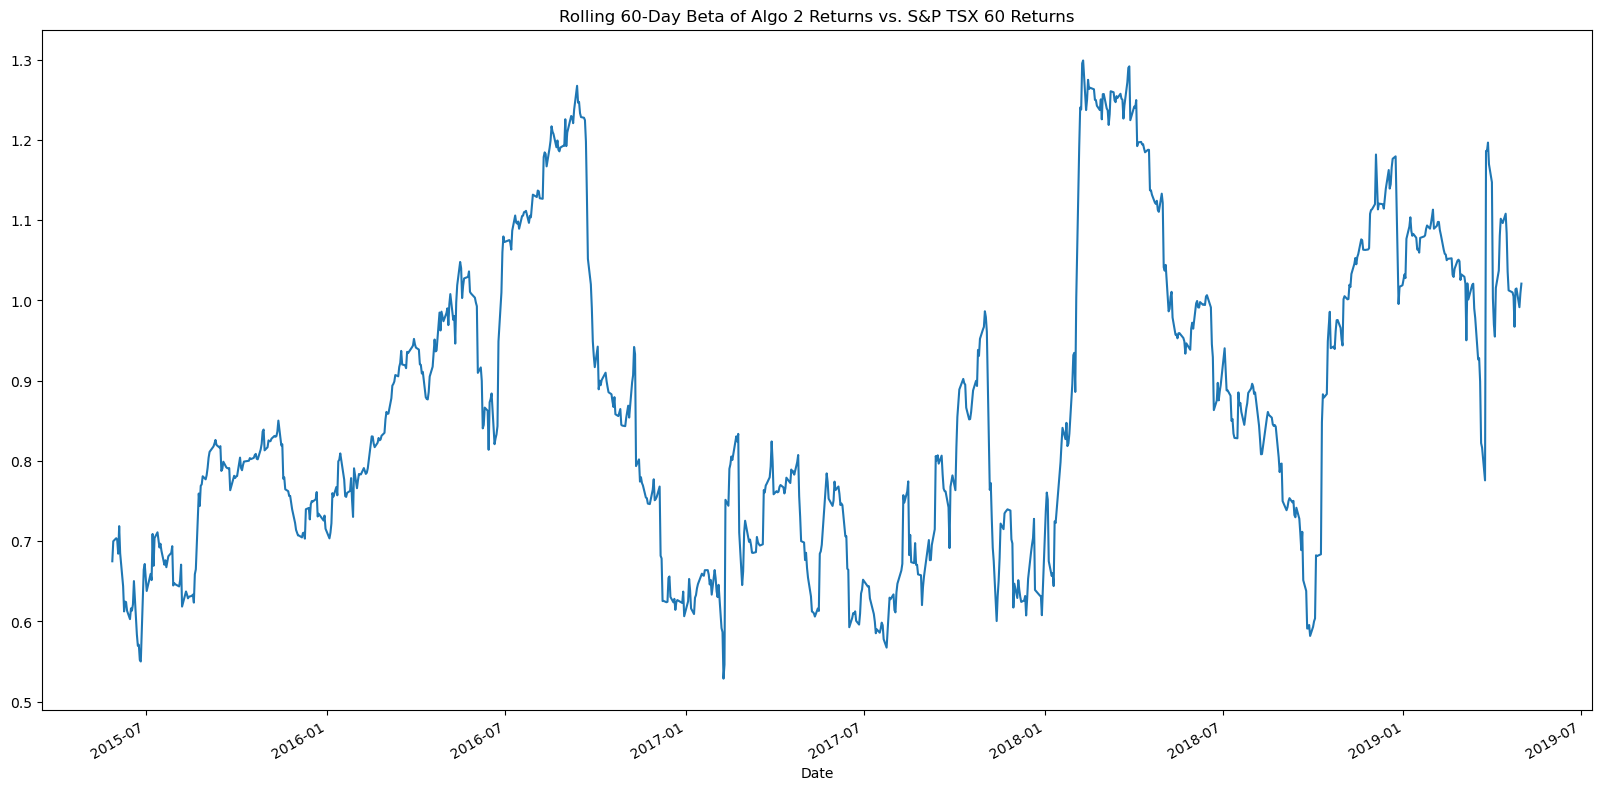

In [25]:
# Calculate covariance of a single portfolio
covariance_algo2 = all_portfolio_returns['Algo 2'].rolling(window=60).cov(all_portfolio_returns['S&P TSX 60'])
covariance_algo2

# Calculate variance of S&P TSX
variance_sptsx = all_portfolio_returns['S&P TSX 60'].rolling(window=60).var()
variance_sptsx

# Computing beta
algo2_beta = covariance_algo2 / variance_sptsx
algo2_beta

# Plot beta trend
algo2_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Algo 2 Returns vs. S&P TSX 60 Returns')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'Exponentially Weighted Average'}, xlabel='Date'>

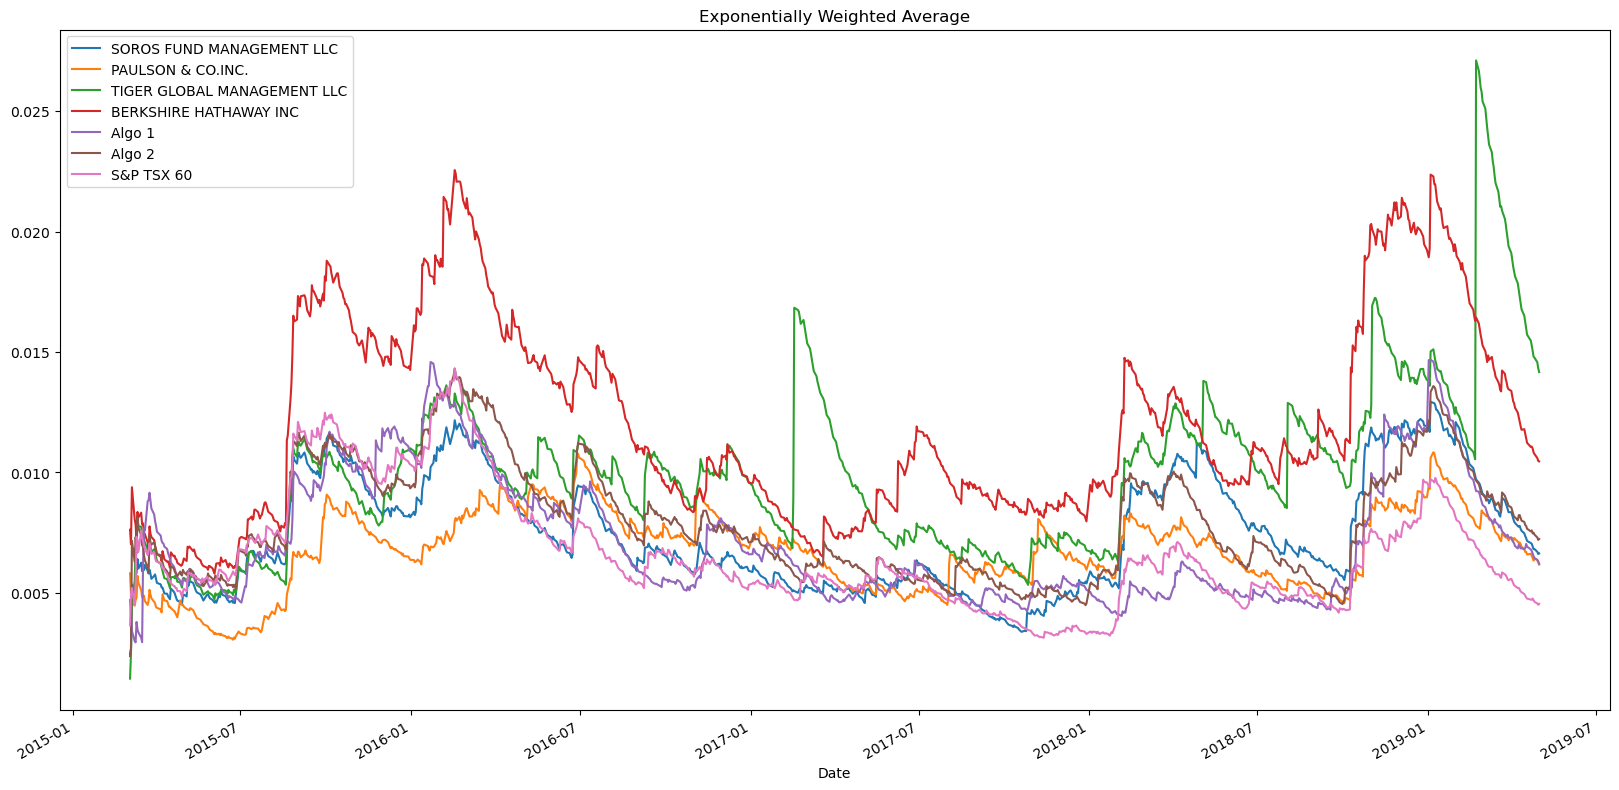

In [26]:
# Use `ewm` to calculate the rolling window
all_portfolio_returns.ewm(halflife=21).std().plot(figsize=(20,10), title="Exponentially Weighted Average")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [27]:
# Annualized Sharpe Ratios
sharpe_ratios = (all_portfolio_returns.mean() * 252) / annualized_std
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX 60                     0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

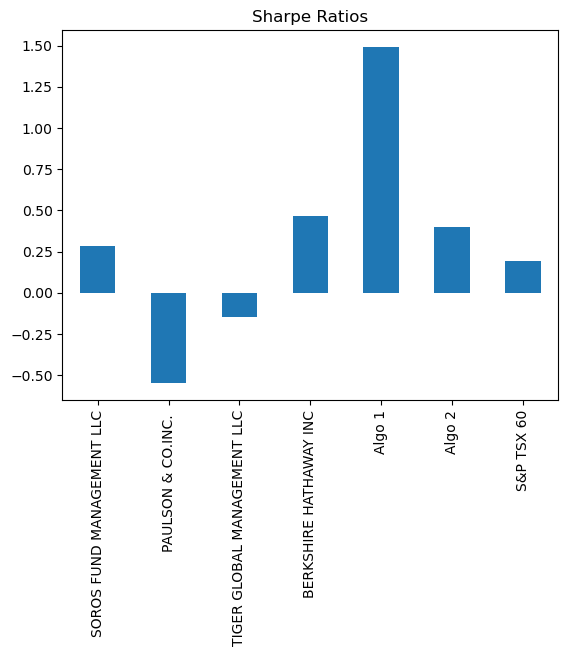

In [28]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Although Algo 2 fell a little below Berkshire Hathaway Inc., overall Algo 1 and Algo 2 both outperformed market and whales portfolios. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at least 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [29]:
# Reading data from 1st stock
l_path = Path("Resources/l_historical.csv")
l_close = pd.read_csv(l_path, parse_dates=True, index_col="Date", infer_datetime_format=True, usecols=['Date','Close'])
l_close.sort_index(inplace=True)
l_close.columns = ['L']
l_close.head()

,L
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42
2018-01-05,57.42
2018-01-08,56.86


In [30]:
# Reading data from 2nd stock
otex_path = Path("Resources/otex_historical.csv")
otex_close = pd.read_csv(otex_path, parse_dates=True, index_col="Date", infer_datetime_format=True, usecols=['Date','Close'])
otex_close.sort_index(inplace=True)
otex_close.columns = ['Otex']
otex_close.head()

,Otex
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16


In [31]:
# Reading data from 3rd stock
shop_path = Path("Resources/shop_historical.csv")
shop_close = pd.read_csv(shop_path, parse_dates=True, index_col="Date", infer_datetime_format=True, usecols=['Date','Close'])
shop_close.sort_index(inplace=True)
shop_close.columns = ['Shop']
shop_close.head()

,Shop
Date,
2018-01-02,132.06
2018-01-03,135.15
2018-01-04,137.46
2018-01-05,137.26
2018-01-08,139.51


In [32]:
# Combine all stocks in a single DataFrame
combined_close = pd.concat([l_close, otex_close, shop_close], axis='columns', join='inner')
combined_close.head()

,L,Otex,Shop
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51


In [33]:
# Reset Date index
#combined_close.reset_index(inplace = True)
#combined_close.head()

In [34]:
# Calculate daily returns
my_portfolio_returns = combined_close.pct_change()

# Drop NAs
my_portfolio_returns.dropna(inplace=True)

# Display sample data
my_portfolio_returns.head()

,L,Otex,Shop
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_portfolio_returns = my_portfolio_returns.dot(weights)

# Display sample data
weighted_portfolio_returns.head()

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Join your returns DataFrame to the original returns DataFrame
combined_portfolio_returns = pd.concat([all_portfolio_returns, weighted_portfolio_returns], axis='columns', join='inner')
combined_portfolio_returns.rename(columns={0:'My Portfolio'}, inplace=True)
combined_portfolio_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,My Portfolio
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999


In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_portfolio_returns.dropna(inplace=True)
combined_portfolio_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P TSX 60                     0
My Portfolio                   0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [38]:
# Calculate the annualized `std`
combined_annualized_std = combined_portfolio_returns.std() * np.sqrt(252)
combined_annualized_std

SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
S&P TSX 60                     0.099121
My Portfolio                   0.224346
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling 21-Day Standard Deviation of combined Portfolios'}, xlabel='Date'>

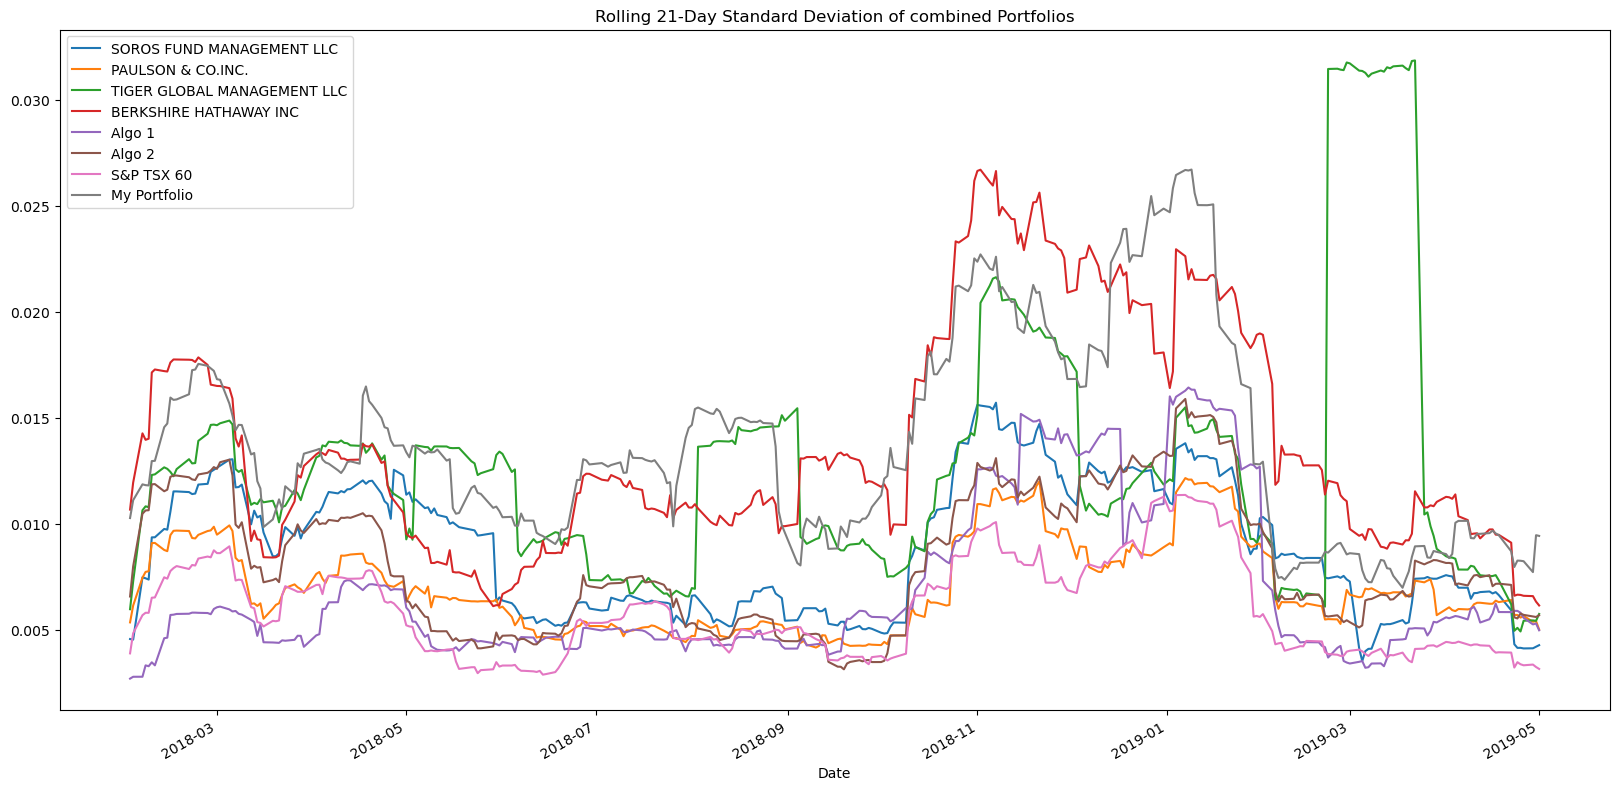

In [39]:
# Calculate rolling standard deviation
# Plot rolling standard deviation
combined_portfolio_returns.rolling(window=21).std().plot(figsize=[20,10], title="Rolling 21-Day Standard Deviation of combined Portfolios")


### Calculate and plot the correlation

In [40]:
# Calculate the correlation
combined_correlation = combined_portfolio_returns.corr()
combined_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,My Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.764174,0.526710,0.782414,0.305525,0.834431,0.686681,0.556093
PAULSON & CO.INC.,0.764174,1.000000,0.536534,0.647407,0.320568,0.797494,0.623728,0.385305
TIGER GLOBAL MANAGEMENT LLC,0.526710,0.536534,1.000000,0.384316,0.130845,0.485258,0.438781,0.303971
BERKSHIRE HATHAWAY INC,0.782414,0.647407,0.384316,1.000000,0.294696,0.783254,0.649817,0.647413
Algo 1,0.305525,0.320568,0.130845,0.294696,1.000000,0.321837,0.284789,0.214770
Algo 2,0.834431,0.797494,0.485258,0.783254,0.321837,1.000000,0.754326,0.563756
S&P TSX 60,0.686681,0.623728,0.438781,0.649817,0.284789,0.754326,1.000000,0.579228
My Portfolio,0.556093,0.385305,0.303971,0.647413,0.214770,0.563756,0.579228,1.000000


<AxesSubplot:>

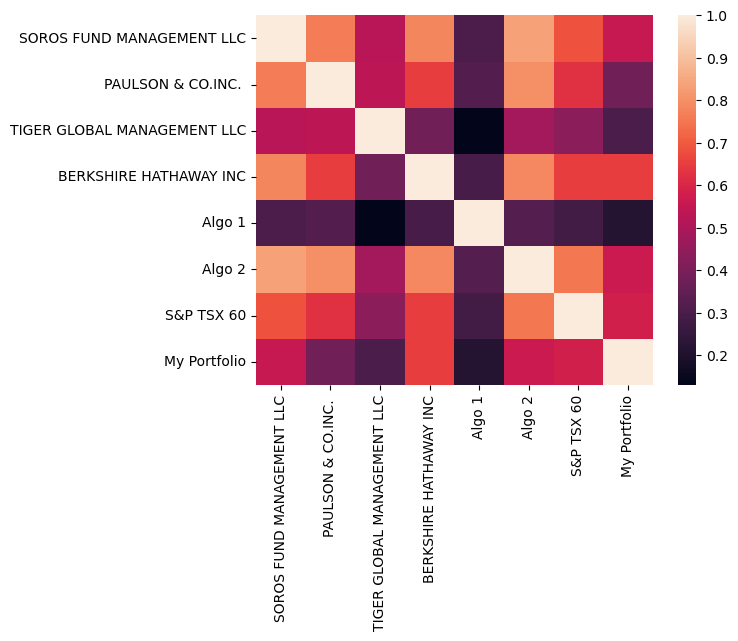

In [41]:
# plot the correlation
sns.heatmap(combined_correlation)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta of my Portfolio Returns vs. S&P TSX 60 Returns'}, xlabel='Date'>

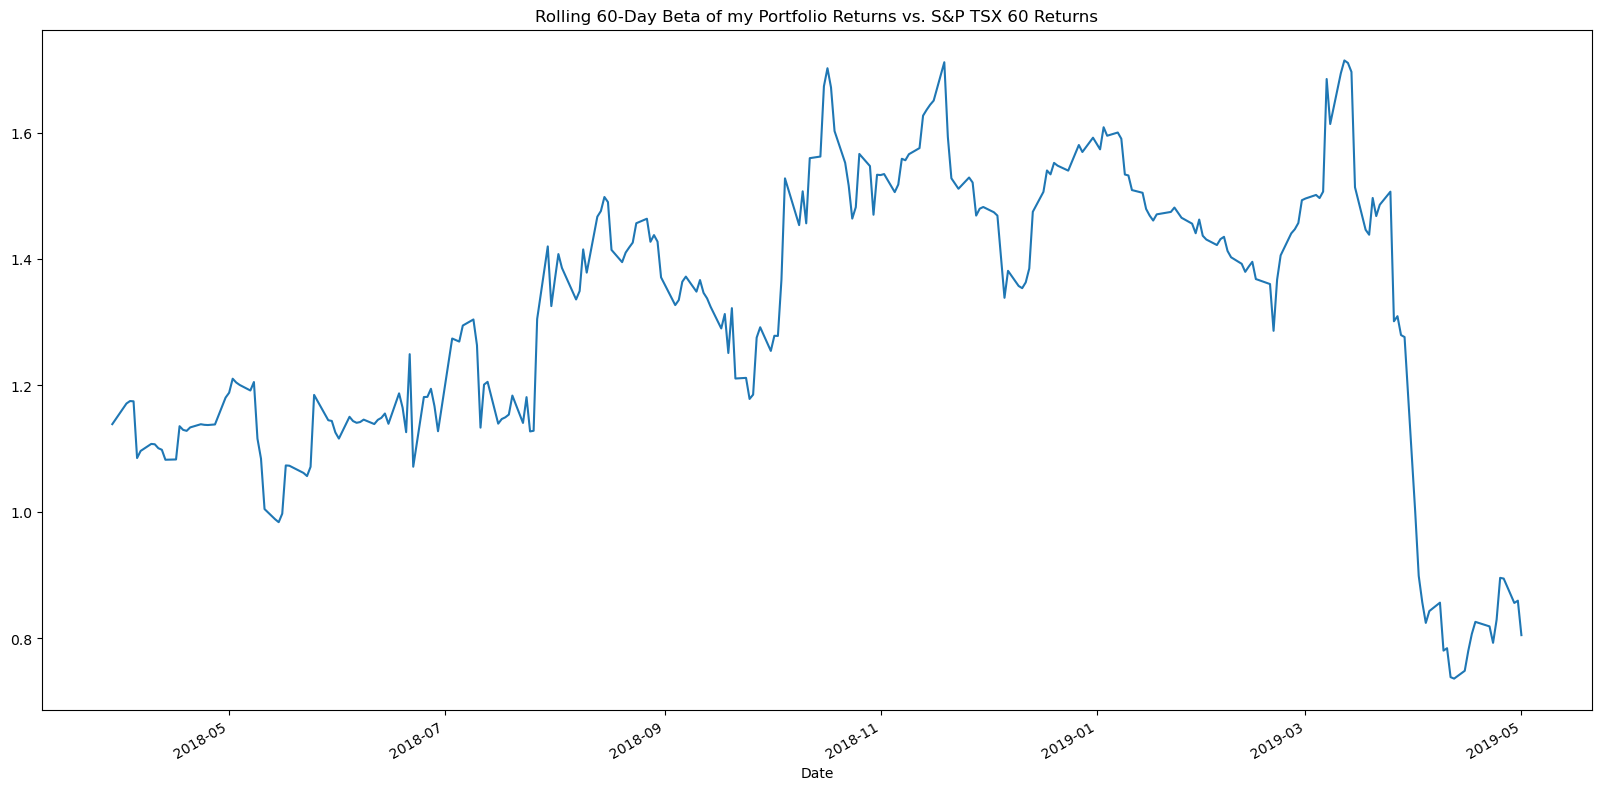

In [42]:
# Calculate and plot Beta
covariance_my_portfolio = combined_portfolio_returns['My Portfolio'].rolling(window=60).cov(combined_portfolio_returns['S&P TSX 60'])
covariance_my_portfolio

variance_sptsx1 = combined_portfolio_returns['S&P TSX 60'].rolling(window=60).var()
variance_sptsx1

# Computing beta
my_portfolio_beta = covariance_my_portfolio / variance_sptsx1
my_portfolio_beta

# Plot beta trend
my_portfolio_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of my Portfolio Returns vs. S&P TSX 60 Returns')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [43]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios1 = (combined_portfolio_returns.mean() * 252) / combined_annualized_std
sharpe_ratios1

SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
S&P TSX 60                     0.034651
My Portfolio                   1.564547
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios for Combined Portfolios'}>

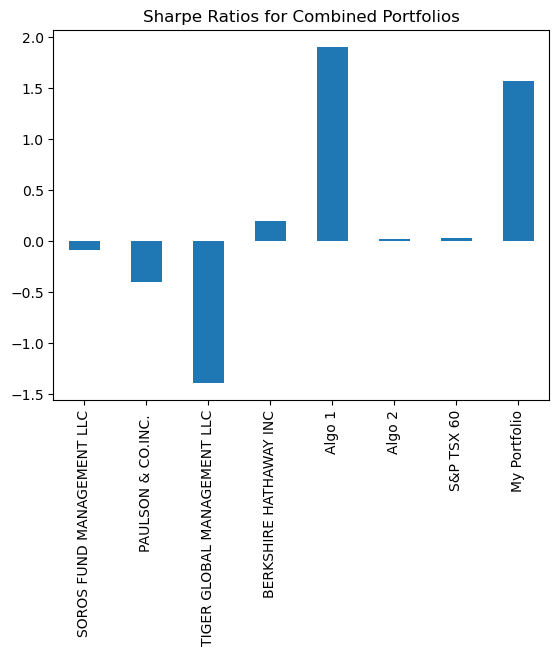

In [44]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios1.plot.bar(title="Sharpe Ratios for Combined Portfolios")

### How does your portfolio do?

My portfolio fell below Algo 1 but outperformed all the other portfolios